In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,151703.000000,1.517030e+05,151702.000000,151702.000000,151702.000000,151702.000000,1.517020e+05,1.517010e+05,151701.000000,151701.000000,151701.000000
mean,40944.748667,4.170415e+17,71.012117,48714.964404,38.535609,-90.162268,8.999827e+04,1.343911e+09,38.535314,-90.162224,0.007726
std,26445.697420,1.308132e+18,147.158145,26861.853159,5.077714,13.721615,3.036973e+05,2.150017e+07,5.111135,13.733818,0.087556
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,18962.500000,1.800400e+14,9.720000,26041.000000,34.620500,-96.786900,7.430000e+02,1.327264e+09,34.739142,-96.844916,0.000000
50%,37925.000000,3.519233e+15,47.790000,48174.000000,39.371600,-87.458100,2.443000e+03,1.329211e+09,39.368025,-87.399067,0.000000
75%,59327.500000,4.635331e+15,83.550000,72011.000000,41.940400,-80.128400,2.047800e+04,1.372302e+09,41.952540,-80.198208,0.000000
max,97253.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373433e+09,66.669356,-66.955602,1.000000


In [3]:
print(train.shape)
print(test.shape)
(1296675, 23)
(555719, 23)

(97254, 23)
(54449, 23)


(555719, 23)

In [4]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  151703.000000  1.517030e+05  151702.000000  151702.000000   
mean    40944.748667  4.170415e+17      71.012117   48714.964404   
std     26445.697420  1.308132e+18     147.158145   26861.853159   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     18962.500000  1.800400e+14       9.720000   26041.000000   
50%     37925.000000  3.519233e+15      47.790000   48174.000000   
75%     59327.500000  4.635331e+15      83.550000   72011.000000   
max     97253.000000  4.992346e+18   13149.150000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  151702.000000  151702.000000  1.517020e+05  1.517010e+05   
mean       38.535609     -90.162268  8.999827e+04  1.343911e+09   
std         5.077714      13.721615  3.036973e+05  2.150017e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.620500     -96.786900  7.430000e+02  1

In [5]:
test.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
54444       54444   2020-07-10 05:09:24  2383461948823908   
54445       54445   2020-07-10 05:10:06    30266994494236   
54446       54446   2020-07-10 05:10:32   348789608637806   
54447       54447   2020-07-10 05:11:14   180046617132290   
54448       54448   2020-07-10 05:11:34      503874407318   

                                   merchant        category     amt    first  \
0                     fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                         fraud_Haley Group        misc_pos   60.05    Brian   
4                     fraud_Johnston-Casper          travel    3.19   Nathan   
...                                     ...             ...     ...      ...   
54444                fraud_Volkman-Predovic    shopping_net   93.97  Patrick   
54445             fraud_Schamberger-O'Keefe     grocery_pos  124.48    Sarah   
54446                   fraud_Auer-Mosciski     grocery_pos  132.35    Megan   
54447      fraud_Jenkins, Hauck and Friesen   gas_transport   62.74    Erika   
54448                  fraud_Corwin-Collins   gas_transport   62.47   Andrew   

           last gender                       street  ...      lat      long  \
0       Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1      Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2         Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3      Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4        Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...         ...    ...                          ...  ...      ...       ...   
54444   Vaughan      M            651 Miller Common  ...  43.7450  -70.9092   
54445    Foster      F   77872 Andrea Glen Apt. 543  ...  37.1349  -77.7364   
54446    Murphy      F           53696 Laura Radial  ...  40.4542  -98.6538   
54447     Mason      F    083 Karen Island Apt. 656  ...  37.5750  -88.9655   
54448     Mcgee      M   4130 Tiffany Glen Apt. 562  ...  29.5894  -98.5201   

       city_pop                            job         dob  \
0        333497            Mechanical engineer  1968-03-19   
1           302         Sales professional, IT  1990-01-17   
2         34496              Librarian, public  1970-10-21   
3         54767                   Set designer  1987-07-25   
4          1126             Furniture designer  1955-07-06   
...         ...                            ...         ...   
54444      1892         Audiological scientist  1956-03-02   
54445      1051        Chief Operating Officer  1976-11-21   
54446       331  Telecommunications researcher  1950-08-19   
54447      3119      Teacher, secondary school  1942-04-17   
54448   1595797            Exhibition designer  1975-12-28   

                              trans_num     unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                 ...           ...        ...         ...   
54444  4b62b8bf9c1d2

In [6]:
train.info

<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2019-01-01 00:00:18  2703186189652095   
1               1   2019-01-01 00:00:44      630423337322   
2               2   2019-01-01 00:00:51    38859492057661   
3               3   2019-01-01 00:01:16  3534093764340240   
4               4   2019-01-01 00:03:06   375534208663984   
...           ...                   ...               ...   
97249       97249   2019-02-26 16:23:37  4178097073221156   
97250       97250   2019-02-26 16:23:47   341283058448499   
97251       97251   2019-02-26 16:25:37     4586260469584   
97252       97252   2019-02-26 16:25:47  3541160328600277   
97253       97253   2019-02-26 16:26:13   342952484382519   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
97249  fraud_Kilback, Nitzsche and Leffler          travel    1.88       Jill   
97250                fraud_Schroeder Group  health_fitness   21.87      Mario   
97251                     fraud_Schoen Ltd       kids_pets    8.86     Melody   
97252                  fraud_Kozey-Kuhlman   personal_care   56.41      Jason   
97253                    fraud_Watsica LLC             NaN     NaN        NaN   

           last gender                         street  ...      lat      long  \
0         Banks      F                 561 Perry Cove  ...  36.0788  -81.1781   
1          Gill      F   43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2       Sanchez      M       594 White Dale Suite 530  ...  42.1808 -112.2620   
3         White      M    9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4        Garcia      M               408 Bradley Rest  ...  38.4207  -79.4629   
...         ...    ...                            ...  ...      ...       ...   
97249    Flores      F               639 Cruz Islands  ...  41.9488  -86.4913   
97250     Johns      M  62130 Miller Square Suite 785  ...  30.9788  -84.7373   
97251  Thompson      F             0362 Anderson Wall  ...  40.1362  -95.2138   
97252     Singh      M                 4720 Anna Ways  ...  39.5723  -90.2379   
97253       NaN    NaN                            NaN  ...      NaN       NaN   

       city_pop                                  job         dob  \
0        3495.0            Psychologist, counselling  1988-03-09   
1         149.0    Special educational needs teacher  1978-06-21   
2        4154.0          Nature conservation officer  1962-01-19   
3        1939.0                      Patent attorney  1967-01-12   
4          99.0       Dance movement psychotherapist  1986-03-28   
...         ...                                  ...         ...   
97249    3104.0           Horticulturist, commercial  1981-03-29   
97250    1461.0  Engineer, broadcasting (operations)  1935-09-08   
97251    1631.0                            Architect  1953-01-20   
97252    1512.0      Commercial/residential surveyor  2003-05-07   
97253       NaN                                  NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1      1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2      a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3      6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4      a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.63

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [8]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [9]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [10]:
print(train.shape)
print(test.shape)
print(data.shape)
(1296675, 23)
(555719, 23)
(1852394, 23)


(97254, 23)
(54449, 23)
(151703, 23)


(1852394, 23)

In [11]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     26   
1           1      630423337322       241         4  107.23       0     46   
2           2    38859492057661       390         0  220.11       1     12   
3           3  3534093764340240       360         2   45.00       1     25   
4           4   375534208663984       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

54449
0


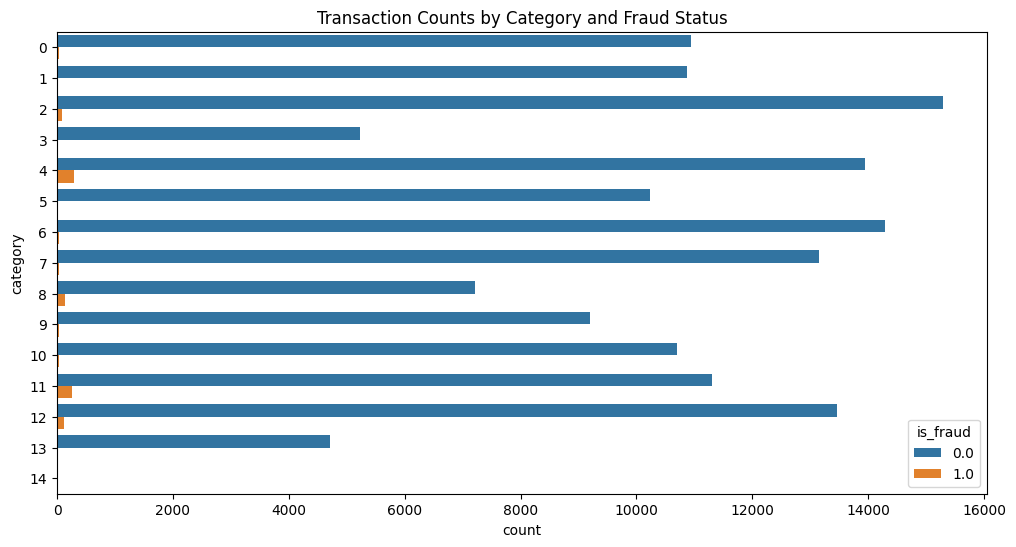

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()


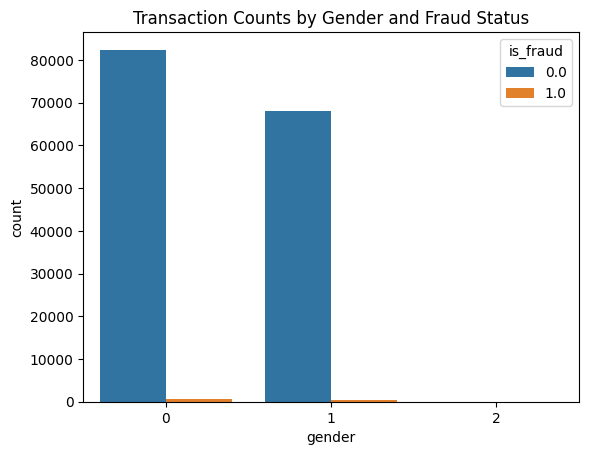

In [16]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

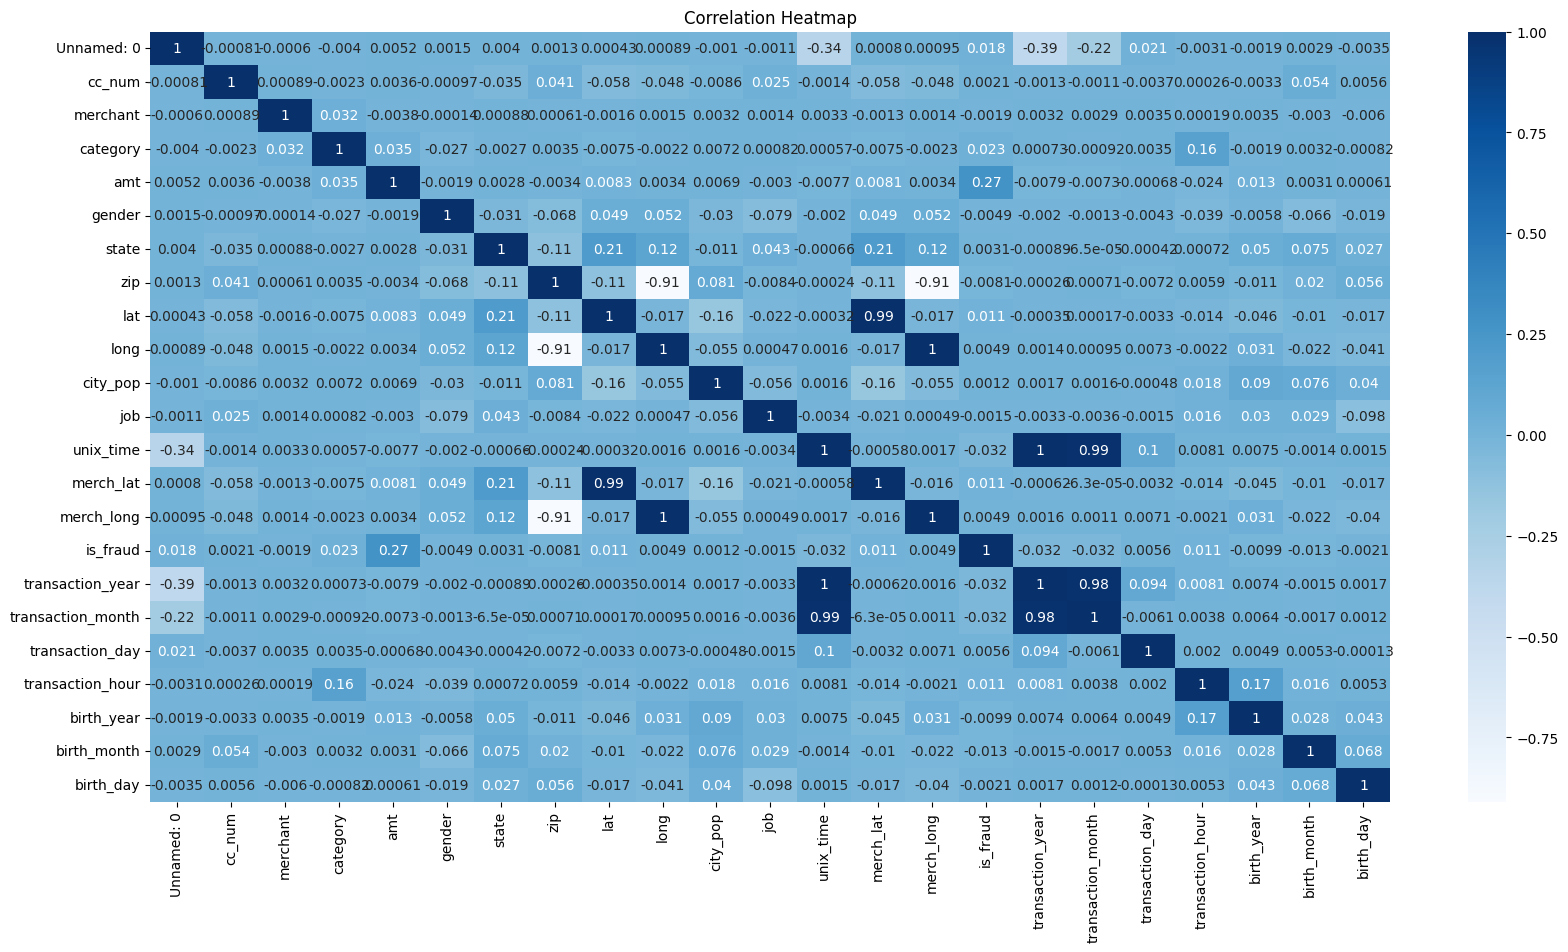

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure inputs are pandas DataFrames or Series
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Step 1: Remove rows where y_train is NaN
valid_indices = y_train.notna()
X_train_clean = X_train.loc[valid_indices]
y_train_clean = y_train.loc[valid_indices]

# Step 2: Impute missing values in X_train only
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Step 3: Train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_imputed, y_train_clean)

# Step 4: Predict and evaluate
y_pred = log_model.predict(X_test_imputed)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     30139
         1.0       0.00      0.00      0.00       202

    accuracy                           0.99     30341
   macro avg       0.50      0.50      0.50     30341
weighted avg       0.99      0.99      0.99     30341

[[30139     0]
 [  202     0]]
Accuracy: 0.993342342045417


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert to proper types (if not already)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Remove rows where y_train is NaN
valid_indices = y_train.notna()
X_train_clean = X_train.loc[valid_indices]
y_train_clean = y_train.loc[valid_indices]

# Impute missing values in X (mean strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_imputed, y_train_clean)

# Predict and evaluate
y_pred = tree_model.predict(X_test_imputed)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30139
         1.0       0.73      0.77      0.75       202

    accuracy                           1.00     30341
   macro avg       0.87      0.89      0.88     30341
weighted avg       1.00      1.00      1.00     30341

[[30082    57]
 [   46   156]]
Accuracy: 0.9966052536172176


In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure X and y are in correct pandas format
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Step 1: Remove rows where y_train is NaN
valid_indices = y_train.notna()
X_train_clean = X_train.loc[valid_indices]
y_train_clean = y_train.loc[valid_indices]

# Step 2: Impute missing values in X using mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Step 3: Train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_imputed, y_train_clean)

# Step 4: Predict and evaluate
y_pred = lr_model.predict(X_test_imputed)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     30139
         1.0       0.00      0.00      0.00       202

    accuracy                           0.99     30341
   macro avg       0.50      0.50      0.50     30341
weighted avg       0.99      0.99      0.99     30341

[[30139     0]
 [  202     0]]
Accuracy: 0.993342342045417


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SyntaxError: invalid syntax (<ipython-input-45-2833056158>, line 1)